In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({
    'font.family': 'serif',
})

In [74]:
# gsm8k on gsm8k
#data = pl.read_csv(f"../../results/PCA-C_gsm8k_20241117_Mistral-7B-Instruct-v0.1_0_final.csv")
# babi cv on gsm8k
#data = pl.read_csv(f"../../results/PCA-C_gsm8k_20241118_Mistral-7B-Instruct-v0.1_1_babi-cv.csv")
# babi on babi
#data = pl.read_csv(f"../../results/R-C_babi_20240926_Mistral-7B-Instruct-v0.1_1.csv")

#model = "Mistral-7B-Instruct"

# Pythia-2.8b on ioi
data = pl.read_csv(f"../../results/PCA-C_A_20240925_pythia-2.8b_1_ioi.csv").filter(pl.col("model")== "EleutherAI/pythia-2.8b")
model = "EleutherAI/pythia-2.8b"

data = data.filter(pl.col('alpha').cast(str).str.contains(r'^-?\d+\.?\d?$'))

# Accuracy

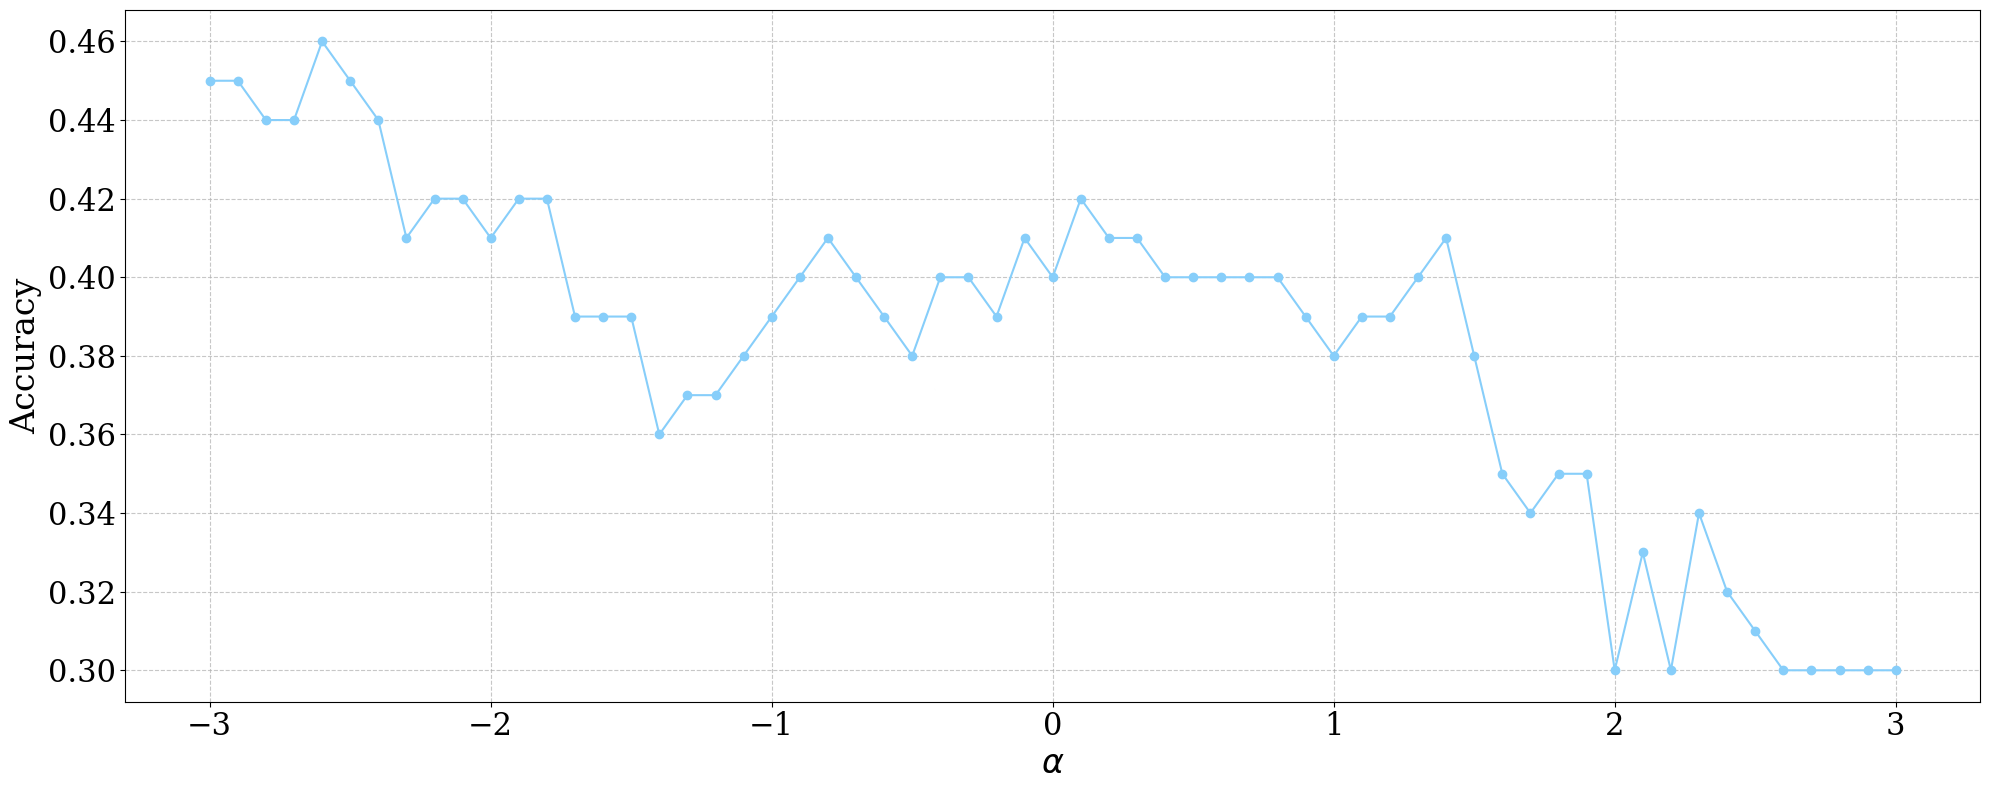

In [69]:
if model == "EleutherAI/pythia-2.8b":

    fig, ax = plt.subplots(figsize=(10, 6))
    eval_tasks = ["A", "B", "AL", "BL"]
    colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(eval_tasks)))
    for i, task in enumerate(eval_tasks):
        task_data = data.filter(pl.col("eval_task") == task)
        if task == "A":
            ax.plot(task_data["alpha"], task_data["accuracy"], color=colors[i], marker='o', linestyle='-', label=task)
        else:
            ax.plot(task_data["alpha"], task_data["accuracy"], color=colors[i], marker='o', linestyle='--', label=task)

    # Set chart title and labels
    #ax.set_title(f"{model.split('/')[-1].capitalize()}", fontsize=16)
    ax.set_xlabel(fr'$\alpha$', fontsize=24)
    ax.set_ylabel('Accuracy', fontsize=24)
    ax.set_ylim(0.65, 0.86)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Move legend below the plot
    ax.legend(bbox_to_anchor=(0.9, 1), loc='upper center', ncol=1, fontsize=20)

    plt.tight_layout()
    plt.show()

else:

    # Sort the data by alpha
    sorted_data = data.sort('alpha')

    # Create the plot
    plt.figure(figsize=(20, 8))
    plt.plot(sorted_data['alpha'], sorted_data['accuracy'], marker='o', linestyle='-', color='lightskyblue')

    # Customize the plot
    plt.xlabel(fr'$\alpha$', fontsize=24)
    plt.ylabel('Accuracy', fontsize=24)
    #plt.title('Accuracy by Alpha for Mistral-7B-Instruct-v0.1', fontsize=24)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Increase font size for tick labels
    plt.tick_params(axis='both', which='major', labelsize=22)

    # Show the plot
    plt.tight_layout()
    plt.show()

# KL Divergence

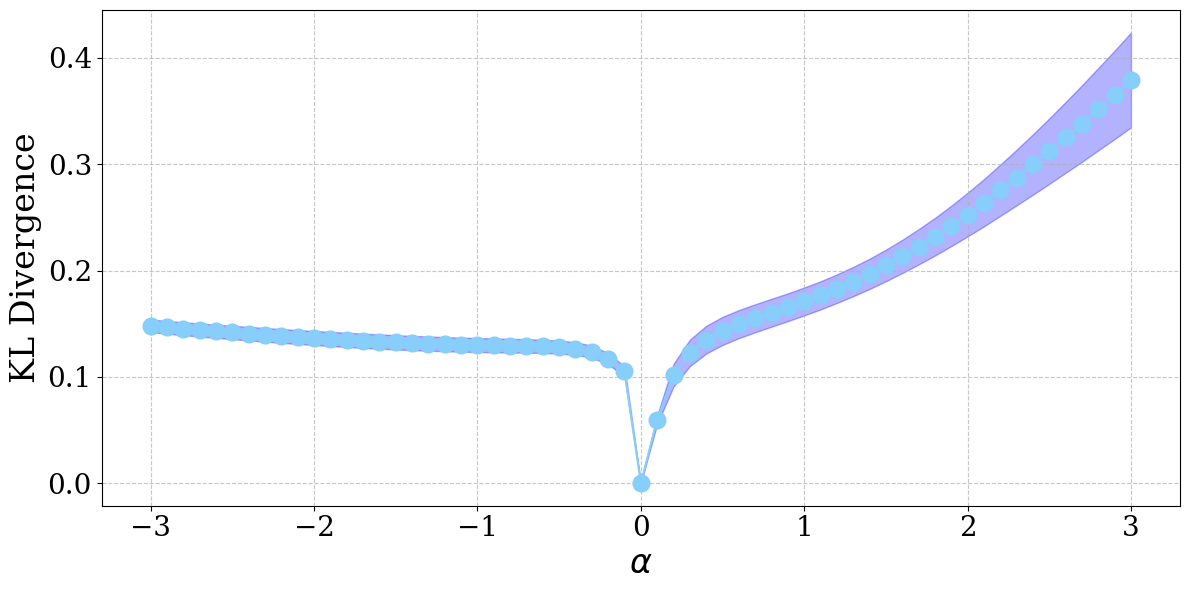

In [70]:
def plot_model_kld(data, model_name):
    # Filter data for the specified model
    model_data = data.filter(pl.col('model').str.contains(model_name))
    
    plt.figure(figsize=(12, 6))
    
    if model_data['task'][0] in ['babi', 'gsm8k']:
        # For babi task, we don't need to consider eval_types
        task_data = model_data.sort('alpha')
        plt.plot(task_data['alpha'], task_data['kld_mean'], marker='o', color='lightskyblue', markersize=12)
        plt.fill_between(task_data['alpha'], 
                         task_data['kld_mean'] - task_data['kld_var'], 
                         task_data['kld_mean'] + task_data['kld_var'], 
                         alpha=0.3, color='blue')
    else:
        eval_tasks = eval_types = ['A', 'B', 'AL', 'BL']
        colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(eval_tasks)))
        
        for i, task in enumerate(eval_tasks):
            task_data = model_data.filter(pl.col('eval_task') == task)
            task_data = task_data.sort('alpha')
            if task == "A":
                plt.plot(task_data['alpha'], task_data['kld_mean'], marker='o', color=colors[i], label=f"{task}", markersize=12)
            else:
                plt.plot(task_data['alpha'], task_data['kld_mean'], marker='o', color=colors[i], linestyle='--', label=f"{task}", markersize=12)
            plt.fill_between(task_data['alpha'], 
                             task_data['kld_mean'] - task_data['kld_var'], 
                             task_data['kld_mean'] + task_data['kld_var'], 
                             alpha=0.3, color=colors[i])

    plt.xlabel(fr'$\alpha$', fontsize=24)
    plt.ylabel('KL Divergence', fontsize=24)
    #plt.title(fr'$D_{{\mathrm{{KL}}}}$ by Alpha for {model_name.split("/")[-1]}', fontsize=28)
    plt.grid(True, linestyle='--', alpha=0.7)
    if model_data['task'][0] == 'ioi':
        plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_model_kld(data, model)

# Entropy

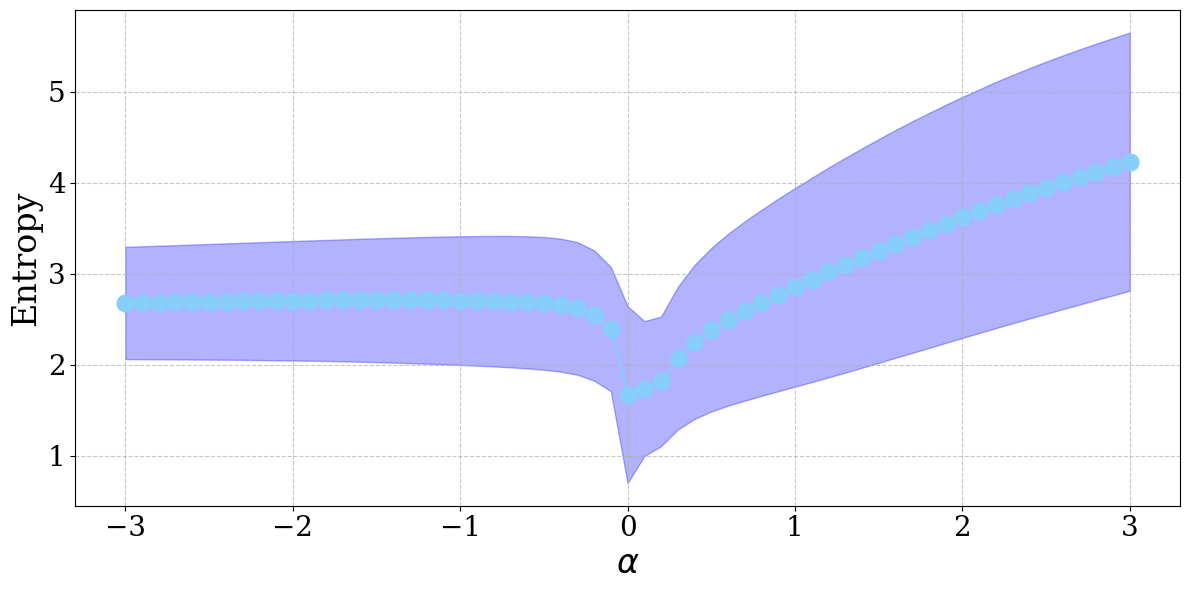

In [71]:
def plot_model_entropy(data, model_name):
    # Filter data for the specified model
    model_data = data.filter(pl.col('model').str.contains(model_name))
    
    plt.figure(figsize=(12, 6))
    
    if model_data['task'][0] in ['babi', 'gsm8k']:
        # For babi task, we don't need to consider eval_types
        task_data = model_data.sort('alpha')
        plt.plot(task_data['alpha'], task_data['entropy_mean'], marker='o', color='lightskyblue', markersize=12)
        plt.fill_between(task_data['alpha'], 
                         task_data['entropy_mean'] - task_data['entropy_var'], 
                         task_data['entropy_mean'] + task_data['entropy_var'], 
                         alpha=0.3, color='blue')
    else:
        eval_tasks = eval_types = ['A', 'B', 'AL', 'BL']
        colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(eval_tasks)))
        
        for i, task in enumerate(eval_tasks):
            task_data = model_data.filter(pl.col('eval_task') == task)
            task_data = task_data.sort('alpha')
            
            if task == "A":
                plt.plot(task_data['alpha'], task_data['entropy_mean'], marker='o', color=colors[i], label=f"{task}", markersize=12)
            else:
                plt.plot(task_data['alpha'], task_data['entropy_mean'], marker='o', color=colors[i], linestyle='--', label=f"{task}", markersize=12)

            plt.fill_between(task_data['alpha'], 
                             task_data['entropy_mean'] - task_data['entropy_var'], 
                             task_data['entropy_mean'] + task_data['entropy_var'], 
                             alpha=0.3, color=colors[i])

    plt.xlabel(fr'$\alpha$', fontsize=24)
    plt.ylabel('Entropy', fontsize=24)
    #plt.title(f'Entropy by Alpha for {model_name.split("/")[-1]}', fontsize=28)
    plt.grid(True, linestyle='--', alpha=0.7)
    if model_data['task'][0] == 'ioi':
        plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_model_entropy(data, model)

# Probability Mass

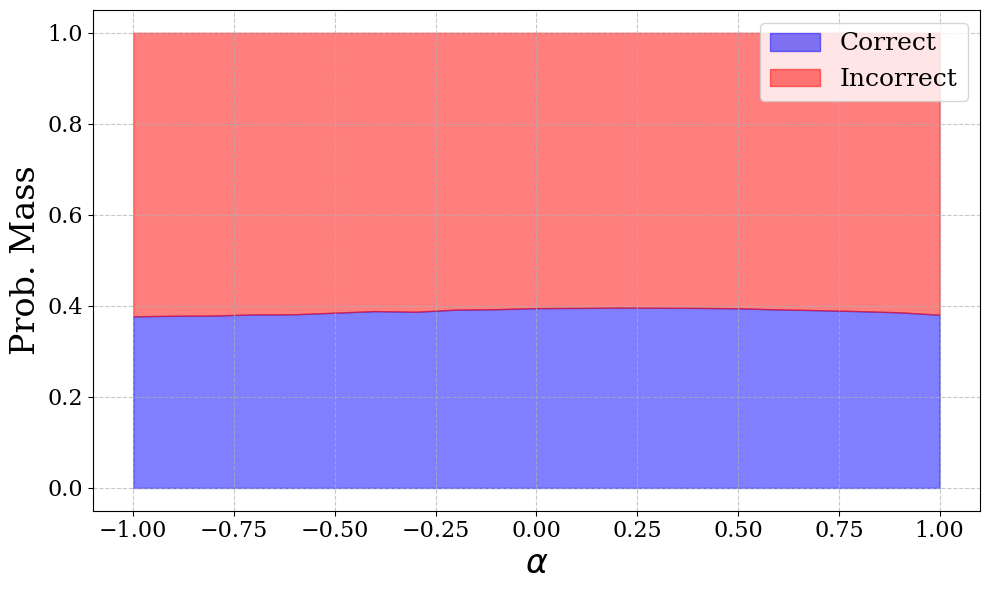

In [76]:
def plot_probability_mass(data, model_name, one_plot=False):
    # Filter data for the specified model
    model_data = data.filter(pl.col('model').str.contains(model_name))
    
    if 'mistral' in model_name.lower():
        # For Mistral models, create a single plot
        fig, ax = plt.subplots(figsize=(10, 6))
        #fig.suptitle(f'Prob. by Alpha for {model_name.split("/")[-1]}', fontsize=28)
        
        task_data = model_data.sort('alpha')
        
        # Create the area plot
        ax.fill_between(task_data['alpha'], task_data['correct_mean'], label='Correct', color='blue', alpha=0.5)
        ax.fill_between(task_data['alpha'], task_data['correct_mean'], 1, label='Incorrect', color='red', alpha=0.5)
        
        # Set labels and title
        ax.set_xlabel(fr'$\alpha$', fontsize=24)
        ax.set_ylabel('Prob. Mass', fontsize=24)
        
        # Add grid and legend
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend(loc='upper right', fontsize=18)
        
        # Increase tick label font size
        ax.tick_params(axis='both', which='major', labelsize=16)
    
    else:
        if one_plot:
            # Create a single plot for eval_task "A"
            fig, ax = plt.subplots(figsize=(10, 6))
            #fig.suptitle(f'P-mass by Alpha for {model_name} (Eval Task: A)', fontsize=28)
            
            task_data = model_data.filter(pl.col('eval_task') == 'A')
            task_data = task_data.sort('alpha')
            
            # Create the area plot
            ax.fill_between(task_data['alpha'], task_data['correct_mean'], label='Correct', color='blue', alpha=0.5)
            ax.fill_between(task_data['alpha'], task_data['correct_mean'], 1, label='Incorrect', color='red', alpha=0.5)
            
            # Set labels and title
            ax.set_xlabel(fr'$\alpha$', fontsize=24)
            ax.set_ylabel('Prob. Mass', fontsize=24)
            
            # Add grid and legend
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.legend(loc='upper right', fontsize=18)
            
            # Increase tick label font size
            ax.tick_params(axis='both', which='major', labelsize=16)
        else:
            # For other models, create a 2x2 grid of subplots
            fig, axs = plt.subplots(2, 2, figsize=(20, 12))
            #fig.suptitle(f'P-mass by Alpha for {model_name}', fontsize=28)
            
            eval_tasks = ['A', 'B', 'AL', 'BL']
            
            for i, task in enumerate(eval_tasks):
                row = i // 2
                col = i % 2
                
                task_data = model_data.filter(pl.col('eval_task') == task)
                task_data = task_data.sort('alpha')
                
                # Create the area plot
                axs[row, col].fill_between(task_data['alpha'], task_data['correct_mean'], label='Correct', color='blue', alpha=0.5)
                axs[row, col].fill_between(task_data['alpha'], task_data['correct_mean'], 1, label='Incorrect', color='red', alpha=0.5)
                
                # Set labels and title
                axs[row, col].set_xlabel('Alpha', fontsize=20)
                axs[row, col].set_ylabel('Prob. Mass', fontsize=20)
                #axs[row, col].set_title(f'Eval Task: {task}', fontsize=24)
                
                # Add grid and legend
                axs[row, col].grid(True, linestyle='--', alpha=0.7)
                axs[row, col].legend(loc='upper right', fontsize=18)
                
                # Increase tick label font size
                axs[row, col].tick_params(axis='both', which='major', labelsize=16)
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_probability_mass(data, model, True)